In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *
import time

In [3]:
def getcols(m1,nrows):
    arr=np.array([])
    for elem in np.cumsum(m1):
        rest=elem%(nrows)
        inte=elem//(nrows)
        if inte%2==1:
            a=nrows-rest
        else:
            a=rest 
        arr=np.append(arr,a)       
    return arr

f=lambda x : nrows-x%(nrows) if x//(nrows)%2==1 else x%(nrows)

In [13]:
def positions(df,step):
    xs=np.unique(df['row'])*step
    ys=np.unique(df['col'])*step
    return xs,ys
    

In [21]:
filename='../../../Acquisition2/Data/Trial_markers_QD/T/PTU_9.ptu'
#os.listdir(filename)

In [22]:
sn=snAPI()
sn.getDevice()
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
sn.unfold.measure()
times, channels = sn.unfold.getBlock()
dtimes=sn.unfold.dTime_T3(times)
markers_Bool=np.array([sn.unfold.isMarker(datai) for datai in channels])
m1=markers_Bool*sn.unfold.markers(channels)[2]
m2=markers_Bool*sn.unfold.markers(channels)[3]
m3=markers_Bool*sn.unfold.markers(channels)[1]


In [6]:
cum=np.cumsum(markers_Bool)
rm=np.array([n%2 for n in cum])
row=np.array(np.cumsum(m2),dtype=int)
df=pd.DataFrame(np.array([dtimes,times,channels,markers_Bool,m1,m2,m3,rm]).T,columns=['dTimes','absTimes','Channels','markers','m1','m2','m3','rm'])
df['row']=row
nrows=np.sum(df['m1'][df['row']==2])
col=np.array([f(x) for x in np.cumsum(m1)],dtype=int)
df['col']=col

In [123]:
data= df[df['rm'] !=1]
data=df[np.cumsum(df['m3'])!=0]#remove data before starting measurement (data start after the first m3 marker)
data=data.drop(columns=['m1', 'm2','m3','markers','rm'])

In [119]:
data

,dTimes,absTimes,Channels,row,col
1906,13952.0,1.835614e+12,131.0,0,1
1907,24416.0,1.837481e+12,3.0,0,1
1908,992.0,1.837501e+12,3.0,0,1
1909,20480.0,1.837514e+12,3.0,0,1
1910,18880.0,1.838216e+12,3.0,0,1
...,...,...,...,...,...
1586357,26688.0,6.267313e+14,3.0,49,0
1586358,17408.0,6.267314e+14,3.0,49,0
1586359,9120.0,6.267316e+14,3.0,49,0
1586360,16320.0,6.267319e+14,3.0,49,0


In [120]:
xs=np.unique(df['row'])
ys=np.unique(df['col'])
M=np.zeros((np.size(xs),np.size(ys)))
for xi in xs:
    for yi in ys:
        M[xi,yi]=np.size(data['dTimes'][(data['row']==xi)&(data['col']==yi)])


In [121]:
x,y=positions(df,0.2)

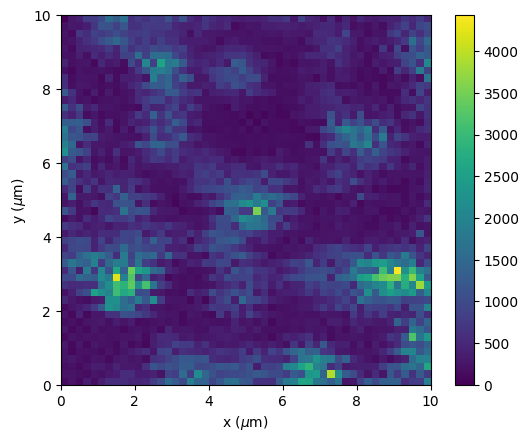

In [122]:
plt.imshow(M,extent=[0,10,0,10])
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.colorbar()

In [111]:
np.min(M)

0.0

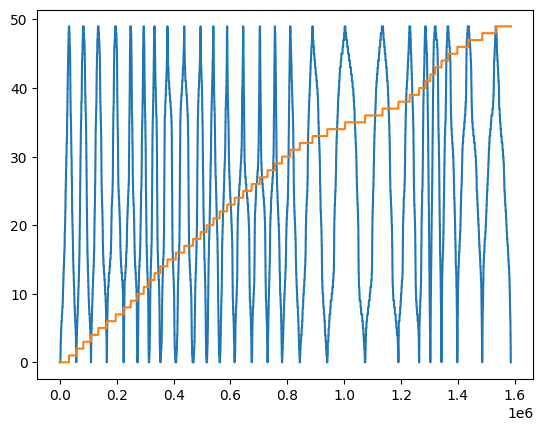

In [112]:
plt.plot(df['col'])
plt.plot(df['row'])

In [85]:
d=data[(data['row']==10)&(data['col']==3)]

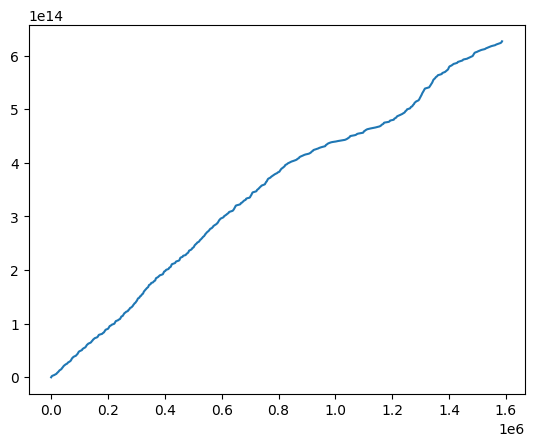

In [105]:
cs=plt.plot(data['absTimes'])
np.sum(cs[0])